In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## 读取数据

In [2]:
data = pd.read_csv('data/credit_default/UCI_Credit_Card.csv')

观察class label的样本分布

In [3]:
next_month = data['default.payment.next.month'].value_counts()
df = pd.DataFrame({'default.payment.next.month':next_month.index, 
                  'values':next_month.values})

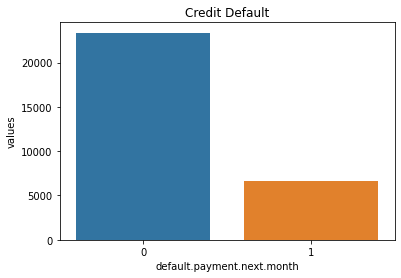

In [4]:
plt.title('Credit Default')
sns.barplot(x='default.payment.next.month', y='values', data=df)
plt.show()

去除数据集中没用的特征：'ID'，并将数据集分成特征数据和label数据

In [5]:
data.drop(['ID'],inplace=True, axis=1)
target = data['default.payment.next.month'].values
columns = data.columns.tolist()

In [6]:
columns.remove('default.payment.next.month')
features = data[columns].values

## 构建模型
分割数据集

In [7]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.3)

构造用于流水线自动训练需要的分类器列表和名字列表

In [8]:
# 构造分类器
classifiers = [
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier()
]

classifier_names = ['svc','decisiontreeclassifier','randomforestclassifier','kneighborsclassifier']

设定网格搜索的参数范围

In [9]:
classifier_param_grid = [
            {'svc__C':[1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':[3,5,6]} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
]

调用网格搜索方法自动化训练分类器，并找到最优参数和准确度

In [10]:
# 对每个分类器进行参数调优
def GridSearchCV_work(pipeline, train_x, train_y, test_x, text_y, model_param_grid , score = 'accuracy'):
    gridsearch = GridSearchCV(estimator=pipeline, param_grid=model_param_grid, scoring=score)
    # 寻找最优参数和最佳准确率
    search = gridsearch.fit(train_x, train_y)
    print('GridSearchCV best parameters：', search.best_params_)
    print('GridSearchCV best score：', search.best_score_)
    predict_y = gridsearch.predict(test_x)
    print('accuracy： %0.4lf' % accuracy_score(test_y, predict_y))
    
    response = {}
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y, predict_y)
    return response

In [11]:
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
            # 数据做标准化
            ('scaler', StandardScaler()),
            # 模型拟合
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')

GridSearchCV best parameters： {'svc__C': 1, 'svc__gamma': 0.01}
GridSearchCV best score： 0.8121904761904762
accuracy： 0.8229
GridSearchCV best parameters： {'decisiontreeclassifier__max_depth': 6}
GridSearchCV best score： 0.8144285714285715
accuracy： 0.8294
GridSearchCV best parameters： {'randomforestclassifier__n_estimators': 6}
GridSearchCV best score： 0.7955714285714285
accuracy： 0.8054
GridSearchCV best parameters： {'kneighborsclassifier__n_neighbors': 8}
GridSearchCV best score： 0.8
accuracy： 0.8101
